# AI Community @ Семинар  №2
## Пример использования numpy 

Numpy - библиотека для Python, позволяющая совершать операции с многомерными матрицами (тензорами) эффективно и удобно

# Базовая алгебра в numpy

In [1]:
import numpy as np
import numpy.linalg as nplg
from scipy import linalg

In [2]:
A = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([3, 5])
c = np.array([1, 6])
print(f'A:\n{A}, \nb:\n{b}')

A:
[[1 2]
 [3 4]
 [5 6]], 
b:
[3 5]


In [3]:
c @ b

33

In [4]:
print('Размер A:{}, размер b:{}'.format(A.shape, b.shape))

Размер A:(3, 2), размер b:(2,)


## Умножение матрицы на вектор

In [5]:
c = A.dot(b)
print('c:\n{}'.format(c))

c:
[13 29 45]


In [6]:
A @ b

array([13, 29, 45])

## Умножение матрицы на матрицу

In [7]:
B = np.array([[1, 7], [4, 9]])

In [8]:
C = A.dot(B)
print('C:\n{}'.format(C))
A @ B

C:
[[ 9 25]
 [19 57]
 [29 89]]


array([[ 9, 25],
       [19, 57],
       [29, 89]])

## Поэлементное перемножение двух матриц

In [9]:
print(A, '\n')
print(C, '\n')

print(A * C)
print(A @ B)

[[1 2]
 [3 4]
 [5 6]] 

[[ 9 25]
 [19 57]
 [29 89]] 

[[  9  50]
 [ 57 228]
 [145 534]]
[[ 9 25]
 [19 57]
 [29 89]]


## Транспонирование

In [10]:
C

array([[ 9, 25],
       [19, 57],
       [29, 89]])

In [11]:
C.T

array([[ 9, 19, 29],
       [25, 57, 89]])

## Обратная матрица
#### Обратная матрица определена только для квадратных матриц
#### Мы поговорим про это на следующих занятиях

In [12]:
print(linalg.inv(B), '\n')
print(nplg.inv(B))

[[-0.47368421  0.36842105]
 [ 0.21052632 -0.05263158]] 

[[-0.47368421  0.36842105]
 [ 0.21052632 -0.05263158]]


In [13]:
B @ linalg.inv(B)

array([[1., 0.],
       [0., 1.]])

## Эксперимент с производительностью вычислений

In [14]:
np.random.seed(23)
np.random.randint(0, 9, size=(5, 5))

array([[3, 6, 8, 6, 8],
       [7, 3, 6, 1, 2],
       [5, 5, 0, 5, 0],
       [3, 1, 7, 4, 1],
       [1, 4, 6, 7, 3]])

Создание двух больших матриц с помощью numpy

In [15]:
M, N, K = 200, 100, 400

In [16]:
Big_A = np.random.random(size=(M, N))
Big_B = np.random.random(size=(N, K))

In [17]:
import time

Проверим время перемножения двух больших матриц с помощью numpy

In [19]:
start_time = time.time()
C_Big = Big_A.dot(Big_B)
numpy_calc_time = time.time() - start_time
print('Numpy multiplication time: {}'.format(numpy_calc_time))

Numpy multiplication time: 0.009952783584594727


In [20]:
import random as rnd

Напишем свои простейшие реализации создания и перемножения двух матриц

In [21]:
def create_random_matrix(shape):
    A = []
    for i in range(shape[0]):
        A_row = [rnd.random() for _ in range(shape[1])]
        A.append(A_row)
    return A

In [22]:
My_Big_A = create_random_matrix(shape=(M, N))
My_Big_B = create_random_matrix(shape=(N, K))

In [23]:
def multiply_matrices(A, B):
    m, n, k = len(A), len(A[0]), len(B[0])
    
    C = []
    for i in range(m):
        row_sum = 0.
        C.append([])
        for j in range(k):
            for p in range(n):
                row_sum += A[i][p] * B[p][j]
            C[i].append(row_sum)
    
    return C

Замерим время перемножения матриц нашим алгоритмом

In [24]:
start_time = time.time()
My_Big_C = multiply_matrices(My_Big_A, My_Big_B)
my_calc_time = time.time() - start_time
print('My multiplication time: {}'.format(my_calc_time))

My multiplication time: 1.7482960224151611


Если вы не меняли размерность матриц, то можете заметить, что время, затрачиваемое на выполнение этой задачи на читом python превосходит все мысленные гранницы. В дальнейшем вам часто придётся с этим сталкиваться с такой ситуацией, поэтому нужно использовать логгер, который будет выводить статус процесса. Для этого очень часто используют tqdm

In [25]:
!pip install tqdm
from tqdm import tqdm_notebook, tqdm

In [26]:
def multiply_matrices_tqdm(A, B):
    m, n, k = len(A), len(A[0]), len(B[0])
    
    C = []
    # оборачиваем итератор функцией tqdm
    for i in tqdm(range(m)):
        row_sum = 0.
        C.append([])
        for j in range(k):
            for p in range(n):
                row_sum += A[i][p] * B[p][j]
            C[i].append(row_sum)
    
    return C

In [27]:
start_time = time.time()
My_Big_C = multiply_matrices_tqdm(My_Big_A, My_Big_B)
my_calc_time = time.time() - start_time
print('My multiplication time: {}'.format(my_calc_time))

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 120.66it/s]

My multiplication time: 1.664590835571289


Сравним время работы

In [28]:
print('Speed up: {}'.format(my_calc_time / numpy_calc_time))

Speed up: 167.24877230806084


Мы потратили 20 минут на собственную реализацию, которая при том еще и работает в тысячу с лишним раз медленнее, чем реализация `numpy`. Теперь вы понимаете, как вам может пригодиться `numpy` в реальных задачах.

## Создание матриц

#### Матрица из единиц размером 2х3

In [29]:
np.ones((2, 3))

array([[1., 1., 1.],
       [1., 1., 1.]])

#### Матрица из нулей размером 2х3

In [30]:
np.zeros(shape=(2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

#### Единичная матрица размера 5x5

In [31]:
a = np.eye(5, 5)
a

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

#### Можно задавать тип элементов внутри матрицы

In [32]:
a = np.eye(5, 5, dtype='int')
print(a)

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


In [33]:
print(np.ones_like(a), '\n')
print(np.zeros_like(a))

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]] 

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


### Индексация и срезы

In [34]:
# !pip install matplotlib
# !pip install skimage

from skimage.io import imread
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [35]:
def plot_images(imgs, names=None, figsize=(20, 10)):
    if not isinstance(imgs, list):
        imgs = [imgs]
    
    fig, axs = plt.subplots(ncols=len(imgs), figsize=figsize)
    if len(imgs) == 1:
        image = imgs[0]
        cmap = 'gray' if (len(image.shape) == 2 or image.shape[2] == 1) else None
        axs.imshow(image, cmap=cmap)
        axs.set_axis_off()
        if names and len(names) > 0:
            axs.set_title(names[0], fontsize=15)
    else:
        for j, ax in enumerate(axs):
            image = imgs[j]
            cmap = 'gray' if (len(image.shape) == 2 or image.shape[2] == 1) else None
            ax.imshow(image, cmap=cmap)
            ax.set_axis_off()
            if names and j < len(names):
                ax.set_title(names[j], fontsize=15)

Изображение представляется той же матрицей, или ее обобщением, называемым тензором. Для более ясного преставления дальнеших операций, будем работать с изображениями.

In [36]:
img = imread('data/lemur.jpg')

In [37]:
type(img)

numpy.ndarray

In [38]:
img.shape

(1184, 1920, 3)

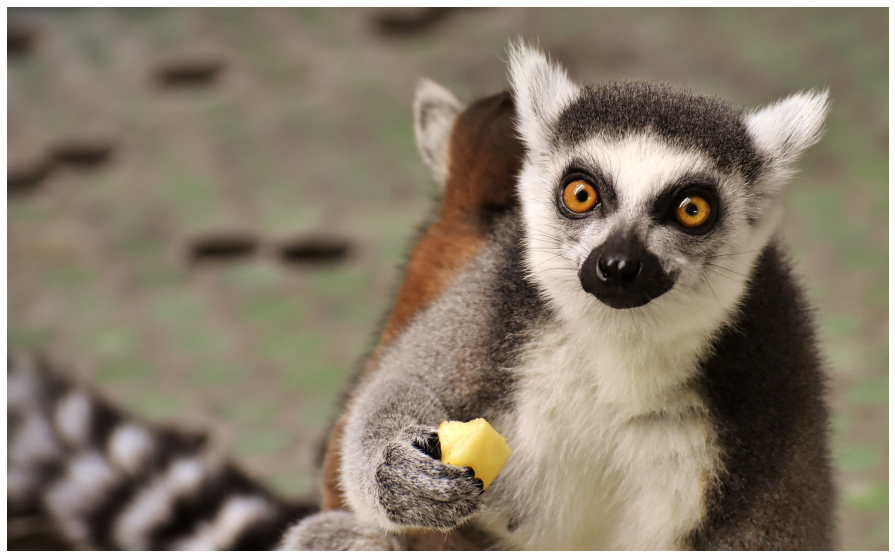

In [39]:
plot_images(img)

#### Выполняем различные срезы по изображению

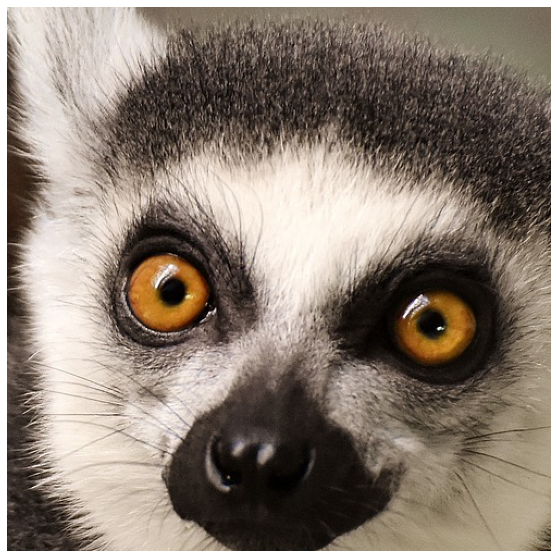

In [40]:
plot_images(img[150:650, 1100:1600, :])

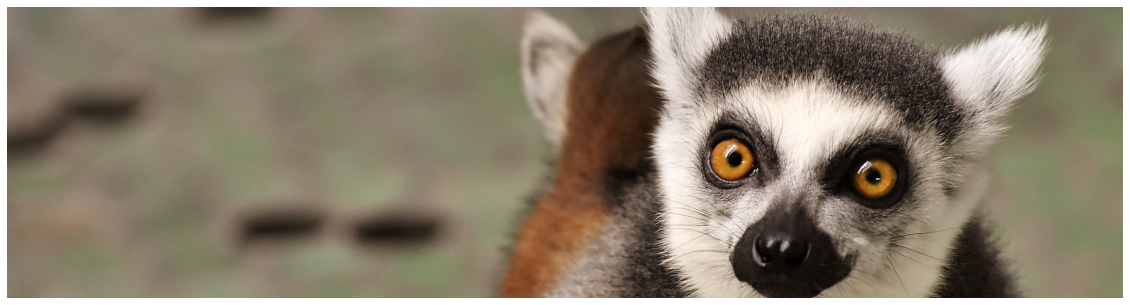

In [41]:
plot_images(img[150:650, :])

#### Посмотрим на цветовые компоненты изображения (RGB)

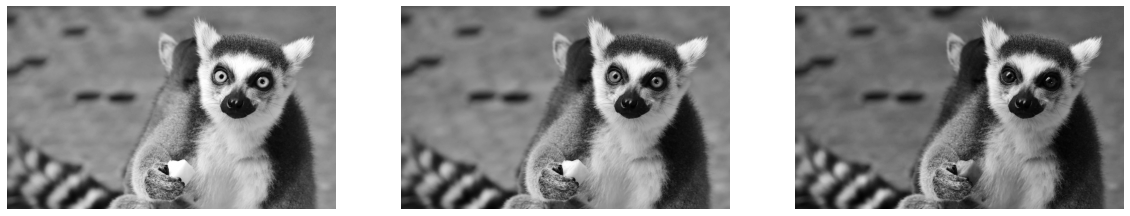

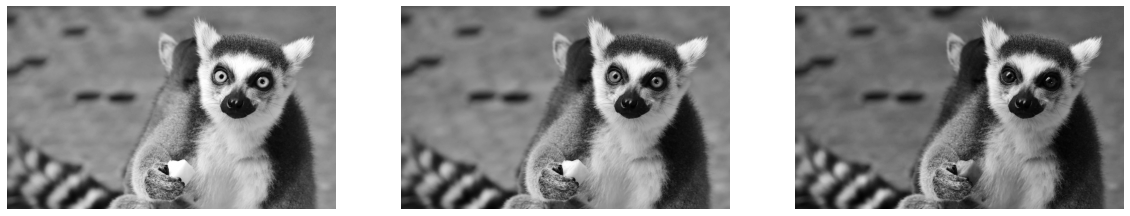

In [42]:
plot_images([img[:, :, 0], img[:, :, 1], img[:, :, -1]])
# Аналогичная операция
plot_images([img[..., 0], img[..., 1], img[..., -1]])

#### Применение масок к изображению

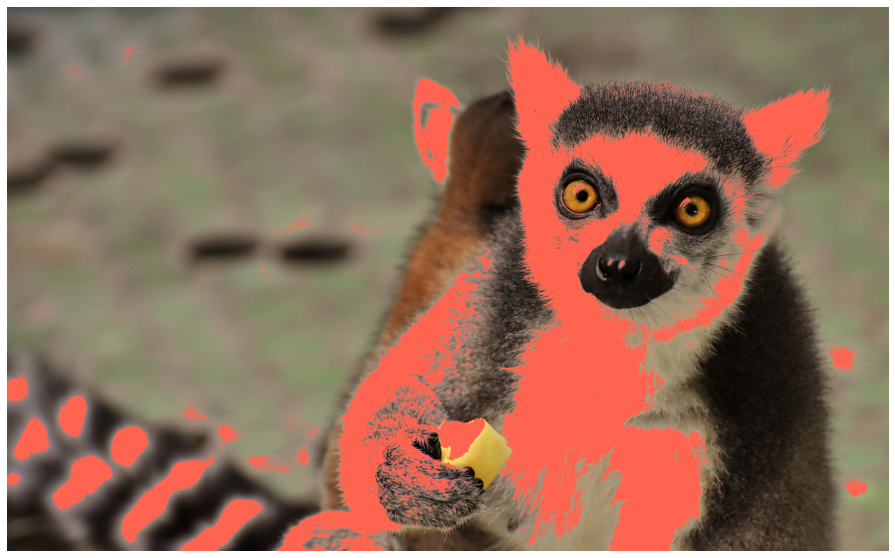

In [45]:
dst = img.copy()

white_mask = img > 128
# white_mask = ~white_mask
white_mask = white_mask.all(axis=2)

dst[white_mask] = [255, 100, 80]
plot_images(dst)

In [46]:
from skimage import draw

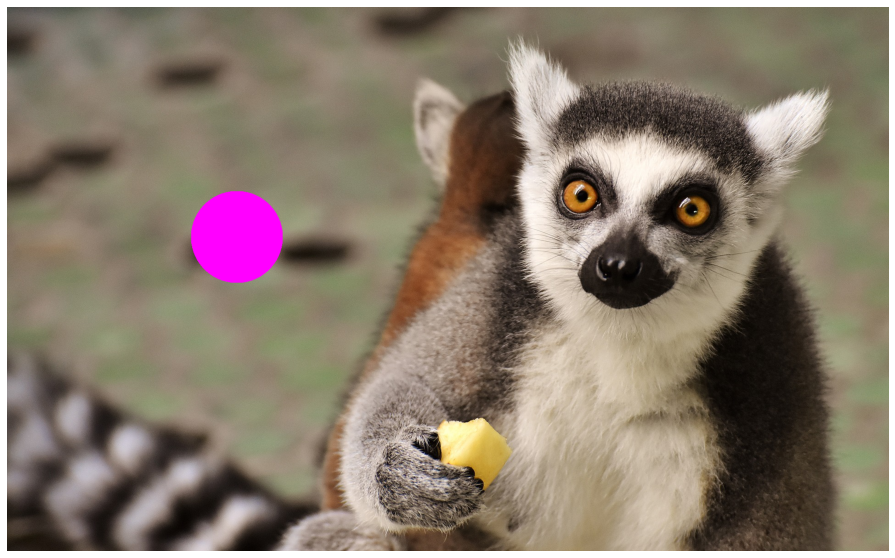

In [47]:
dst = img.copy()
rr, cc = draw.disk(center=(500, 500), radius=100, shape=img.shape)
dst[rr, cc] = [255, 0, 255] 
plot_images(dst)

### Еще немного numpy

#### Создадим вектор из 16 элементов [0; 16)

In [48]:
a_ = np.arange(160000)
a = np.arange(16)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

#### Поменяем его shape

In [49]:
b_ = a_.reshape((400, 400))
b = a.reshape((4, 4))
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

#### Выпрямим его обратно

In [50]:
b.flatten(), b.reshape(-1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]))

In [52]:
%timeit b_.flatten() # Создаёт новый массив
%timeit b_.reshape(-1) # Изменяет индексы текущего массива

26.1 µs ± 786 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
852 ns ± 18.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


#### Можем сохранять и загружать матрицы numpy

In [53]:
np.save('data/lemur_processed.npy', dst)

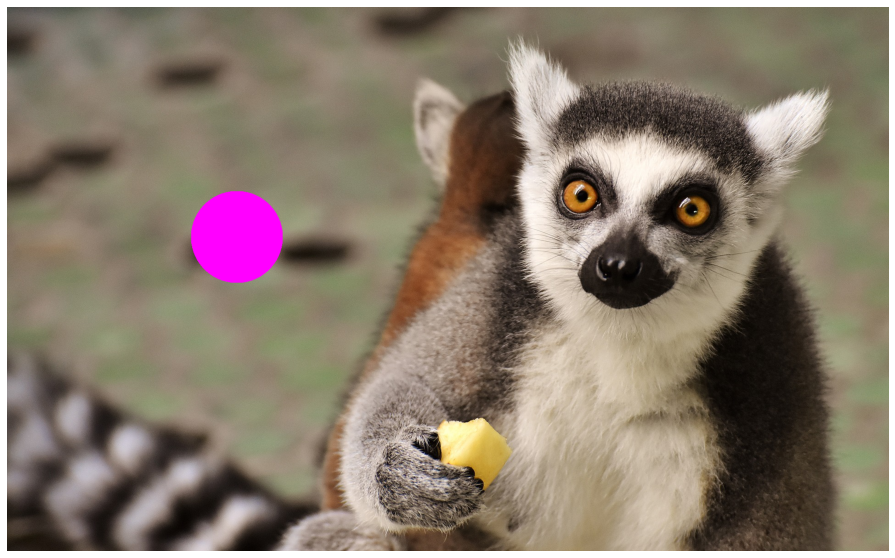

In [54]:
lemur_loaded = np.load('data/lemur_processed.npy')
plot_images(lemur_loaded)